# 911 Calls Project

## Data and Setup

____
 Importing numpy and pandas 

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import time

 Importing visualization libraries 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


 Checking the head of our dataframe

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


The top 5 zipcodes for 911 calls

In [26]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

The top 5 townships (twp) for 911 calls

In [11]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Number of unique title codes

In [12]:
df['title'].nunique()

110

Creating a new column called "Reason" corresponding with the title column

In [19]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [14]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

The most common Reason for a 911 call based off of the Reason column

In [15]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Creating a countplot of 911 calls by Reason.

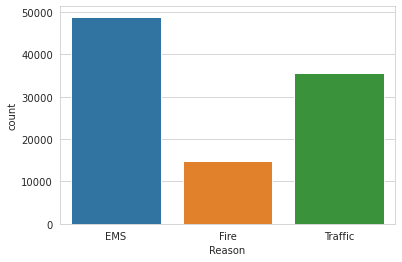

In [17]:
sns.countplot(x='Reason',data=df)

Checking the data type of the objects in the timeStamp column

In [10]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Converting the column from strings to DateTime objects.

In [9]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [12]:
df['timeStamp'][0].hour

17

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day_of_week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

Mapping the actual string names to the day of the week

In [14]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['Day_of_week'] = df['Day_of_week'].map(dmap)

Creating a countplot of the Day of Week column with the hue based off of the Reason column

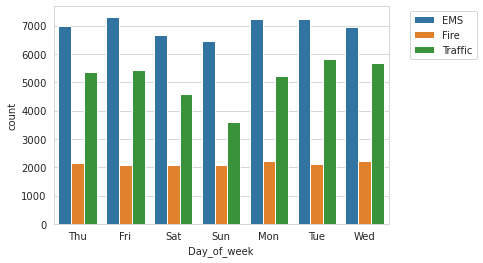

In [21]:
sns.countplot(x='Day_of_week',data=df,hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05,1))

Creating a countplot of the Month column with the hue based off of the Reason column

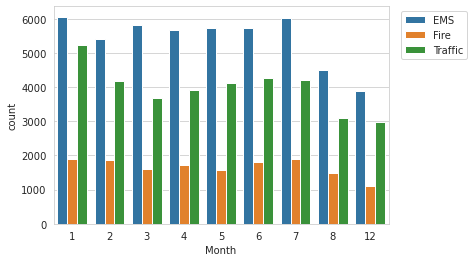

In [23]:
sns.countplot(x='Month',data=df,hue = 'Reason')
plt.legend(bbox_to_anchor=(1.25,1))

Creating a gropuby object called byMonth grouping the DataFrame by the month column.

In [24]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Day_of_week,Reason
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Creating a simple plot off of the dataframe indicating the count of calls per month.

In [28]:
df.dtypes


lat                   float64
lng                   float64
desc                   object
zip                   float64
title                  object
timeStamp      datetime64[ns]
twp                    object
addr                   object
e                       int64
Hour                    int64
Month                   int64
Day_of_week            object
Reason                 object
dtype: object

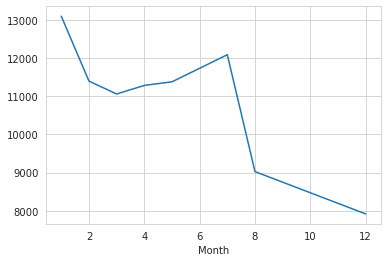

In [31]:
byMonth['addr'].plot()

Creating a linear fit on the number of calls per month.

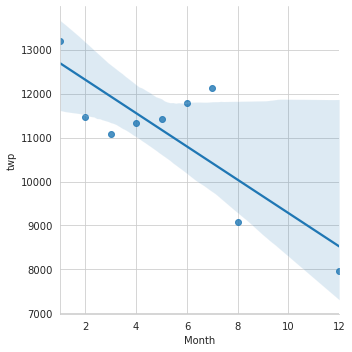

In [32]:
sns.lmplot(x = 'Month', y = 'twp', data = byMonth.reset_index())

Creating a new column called 'Date' that contains the date from the timeStamp column.

In [57]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [58]:
df['timeStamp'][0].date

<function Timestamp.date>

Applying groupby on this Date column with the count() aggregate and creating a plot of counts of 911 calls.

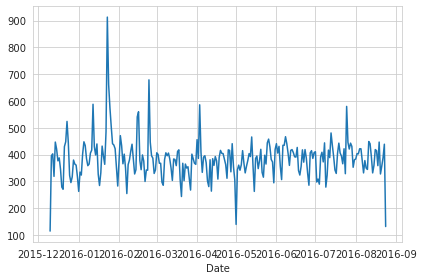

In [65]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

Creating 3 separate plots with each plot representing a Reason for the 911 call

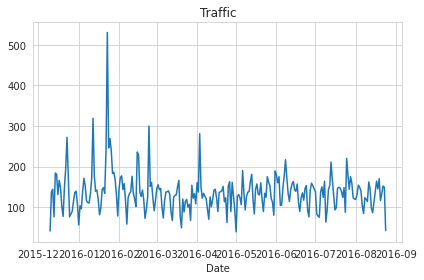

In [69]:
df[df['Reason']=='Traffic'].groupby('Date')['addr'].count().plot()
plt.title('Traffic')
plt.tight_layout()

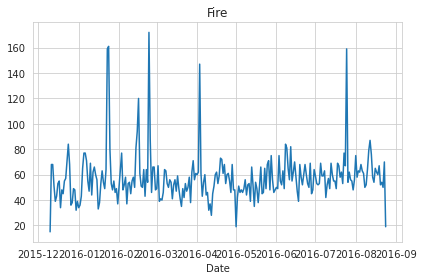

In [70]:
df[df['Reason']=='Fire'].groupby('Date')['addr'].count().plot()
plt.title('Fire')
plt.tight_layout()

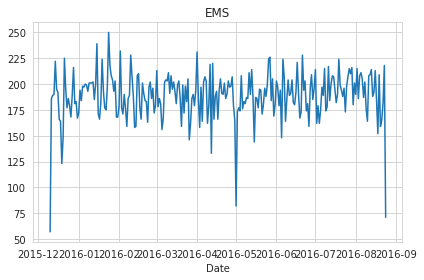

In [71]:
df[df['Reason']=='EMS'].groupby('Date')['addr'].count().plot()
plt.title('EMS')
plt.tight_layout()

Creating  heatmaps, but first restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [75]:
dayHour = df.groupby(by=['Day_of_week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Creating a HeatMap using this new DataFrame.

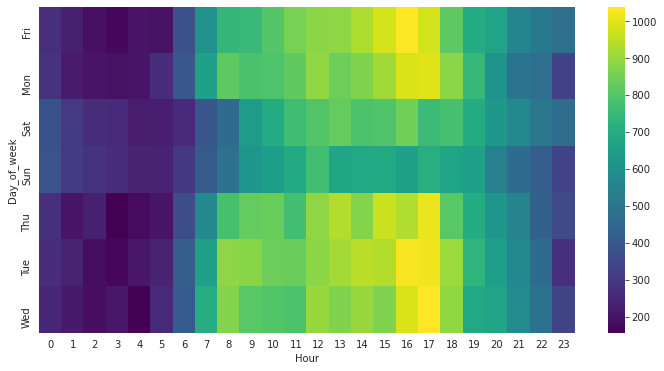

In [79]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

Creating a clustermap using this DataFrame.

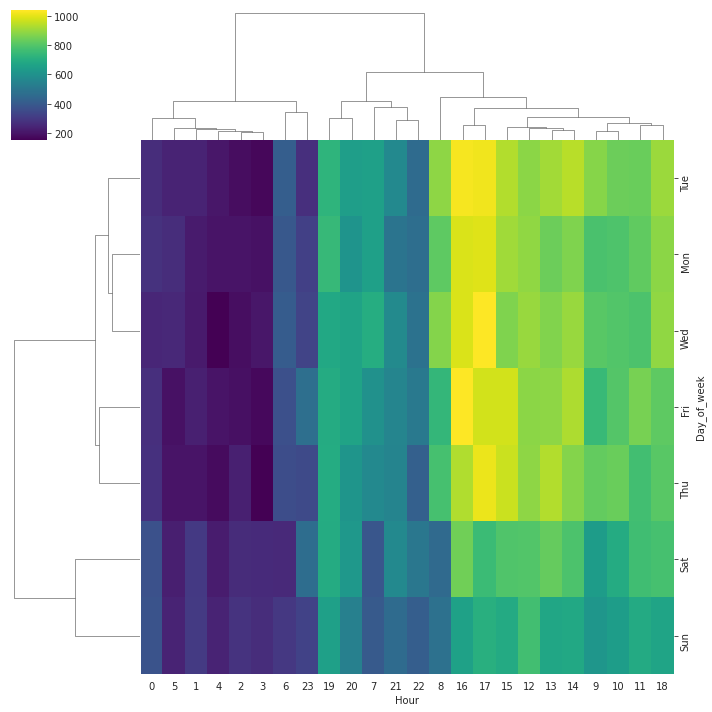

In [80]:
sns.clustermap(dayHour,cmap='viridis')

Repeating the same plots and operations, for a DataFrame that shows the Month as the column.

In [96]:
dayMonth = df.groupby(by=['Month','Day_of_week']).count()['Reason'].unstack()


In [97]:
dayMonth.head()

Day_of_week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Month,,,,,,,
1,1970,1727,2291,1960,1584,1973,1700
2,1581,1964,1441,1229,1596,1753,1903
3,1525,1535,1266,1102,1900,1884,1889
4,1958,1598,1734,1488,1601,1430,1517
5,1730,1779,1444,1424,1590,1918,1538


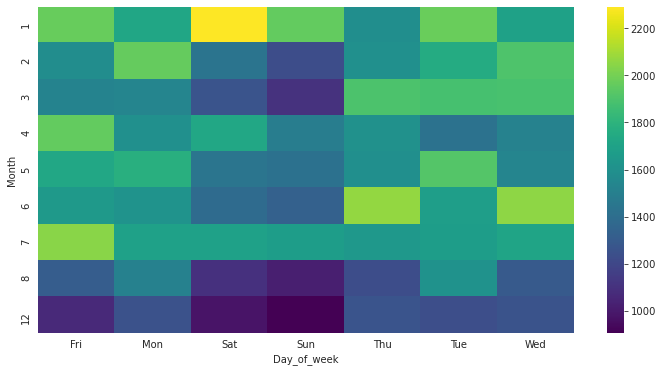

In [98]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

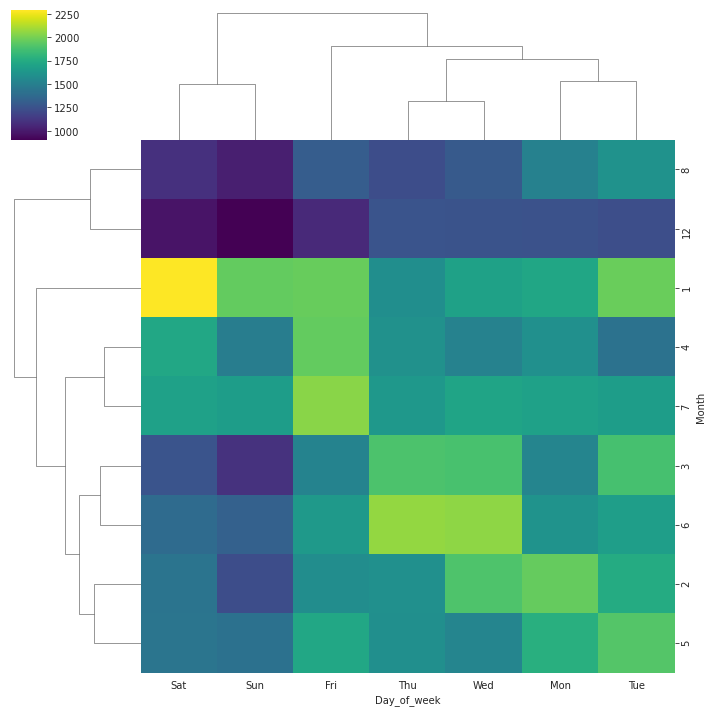

In [99]:
sns.clustermap(dayMonth, cmap = 'viridis')